# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

In [3]:
cities

['ust-nera',
 'yellowknife',
 'puerto penasco',
 'fort bragg',
 "kapa'a",
 'hinna',
 'formosa do rio preto',
 'otjiwarongo',
 'avarua',
 'port-aux-francais',
 'chonchi',
 'atafu village',
 'waitangi',
 'coquimbo',
 'bilibino',
 'blackmans bay',
 'margaret river',
 'spassk',
 'stephenville',
 'lihue',
 'simpang',
 'flying fish cove',
 'ribeira grande',
 "yashkul'",
 'tiksi',
 'college',
 'punta arenas',
 'iqaluit',
 'usogorsk',
 'oriximina',
 'mezhdurechenskiy',
 'cabo san lucas',
 'susuman',
 'pemangkat',
 "'ohonua",
 'hawaiian paradise park',
 'lecheng',
 'andalgala',
 'huoqiu chengguanzhen',
 'venafro',
 'olonkinbyen',
 'puerto natales',
 'ilulissat',
 'edinburgh of the seven seas',
 'baruun-urt',
 'rio grande',
 'el bolson',
 'adamstown',
 'saynshand',
 'bredasdorp',
 'albany',
 'kodiak',
 'west island',
 'san antonio del estrecho',
 'rawson',
 'katsuura',
 'bethel',
 'arawa',
 'afaahiti',
 'la passe',
 'yuanping',
 'sona',
 'queenstown',
 'ceeldheer',
 'magadan',
 "mil'kovo",
 'sai

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# # Set the API base URL
# url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities[0:10]):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = url + f"&q={city}"
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         city_date = city_weather["dt"]

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
    
#     # sleep
#     time.sleep(1)
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [5]:
rows = []

# loop cities
for city in cities[0:30]:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)
                        temp_max=weather_data.get("main", {}).get("temp_max", np.nan)
                       

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "Max_Temp": temp_max, 
                              "date": date}

            #             print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("failed to extract lat and lon from response")
                    print(geo_data)
            else:
                print(f"did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"Something went terribly wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

ust-nera was processed successfully.
yellowknife was processed successfully.
puerto penasco was processed successfully.
fort bragg was processed successfully.
kapa'a was processed successfully.
hinna was processed successfully.
formosa do rio preto was processed successfully.
otjiwarongo was processed successfully.
Something went terribly wrong for avarua
HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?lat=-21.2074736&lon=-159.7708145&appid=6e3f78ca9ac565480766d16ae7bac7a5&units=imperial (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)')))
avarua was processed successfully.
port-aux-francais was processed successfully.
chonchi was processed successfully.
did not find any geolocation data for city: atafu village
atafu village was processed successfully.
waitangi was processed successfully.
coquimbo was processed successfully.
bilibino was processed successfully.
blackmans bay was process

In [6]:
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(rows)}")

Number of cities in the list: 28


In [7]:
df = pd.DataFrame(rows)
df

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Ust-Nera,RU,64.566376,143.237839,39.60,1009,90,1684986919,85,39.60,1684986919
1,Yellowknife,CA,62.454081,-114.377385,62.78,1011,48,1684986921,20,62.78,1684986921
2,Rocky Point,MX,31.317087,-113.531819,75.90,1007,64,1684986922,0,75.90,1684986922
3,Fort Bragg,US,35.140311,-79.154146,60.35,1015,62,1684986924,75,64.72,1684986924
4,Cape Town,ZA,-33.928992,18.417396,55.06,1008,93,1684986925,75,55.89,1684986925
5,Hinna,NO,58.910323,5.727972,46.69,1026,83,1684986927,16,48.06,1684986927
6,Formosa do Rio Preto,BR,-11.041454,-45.190398,71.44,1015,78,1684986928,77,71.44,1684986928
7,Otjiwarongo,NA,-20.463583,16.649099,51.12,1016,61,1684986930,23,51.12,1684986930
8,Port-aux-Français,FR,-49.349761,70.219956,42.37,1003,99,1684986933,100,42.37,1684986933
9,Chonchi,CL,-42.623976,-73.772442,46.02,1005,80,1684986934,88,46.02,1684986934


In [8]:
# Show Record Count
df.count()

city           28
country        28
latitude       28
longitude      28
temperature    28
pressure       28
humidity       28
wind_speed     28
cloudiness     28
Max_Temp       28
date           28
dtype: int64

In [9]:
# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Ust-Nera,RU,64.566376,143.237839,39.60,1009,90,1684986919,85,39.60,1684986919
1,Yellowknife,CA,62.454081,-114.377385,62.78,1011,48,1684986921,20,62.78,1684986921
2,Rocky Point,MX,31.317087,-113.531819,75.90,1007,64,1684986922,0,75.90,1684986922
3,Fort Bragg,US,35.140311,-79.154146,60.35,1015,62,1684986924,75,64.72,1684986924
4,Cape Town,ZA,-33.928992,18.417396,55.06,1008,93,1684986925,75,55.89,1684986925


In [10]:
# Export the City_Data into a csv
df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
City_ID,,,,,,,,,,,
0,Ust-Nera,RU,64.566376,143.237839,39.60,1009,90,1684986919,85,39.60,1684986919
1,Yellowknife,CA,62.454081,-114.377385,62.78,1011,48,1684986921,20,62.78,1684986921
2,Rocky Point,MX,31.317087,-113.531819,75.90,1007,64,1684986922,0,75.90,1684986922
3,Fort Bragg,US,35.140311,-79.154146,60.35,1015,62,1684986924,75,64.72,1684986924
4,Cape Town,ZA,-33.928992,18.417396,55.06,1008,93,1684986925,75,55.89,1684986925


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

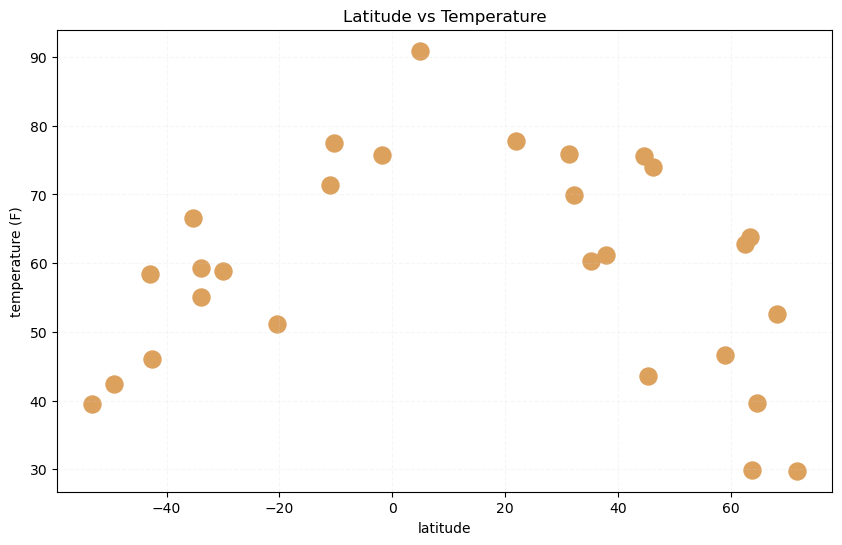

<Figure size 640x480 with 0 Axes>

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.temperature, color="#dda15e", s=150)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

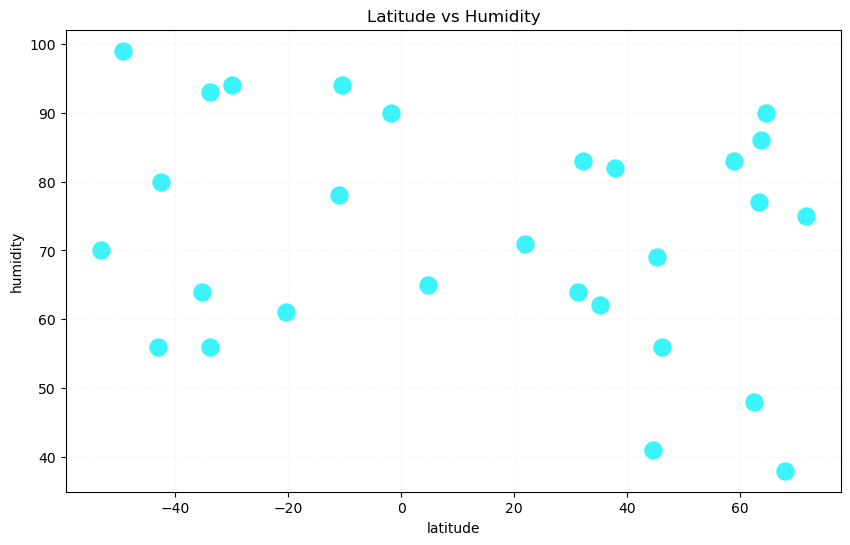

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig2.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.humidity, color="#3BF4FB", s=150)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # Save the figure
plt.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

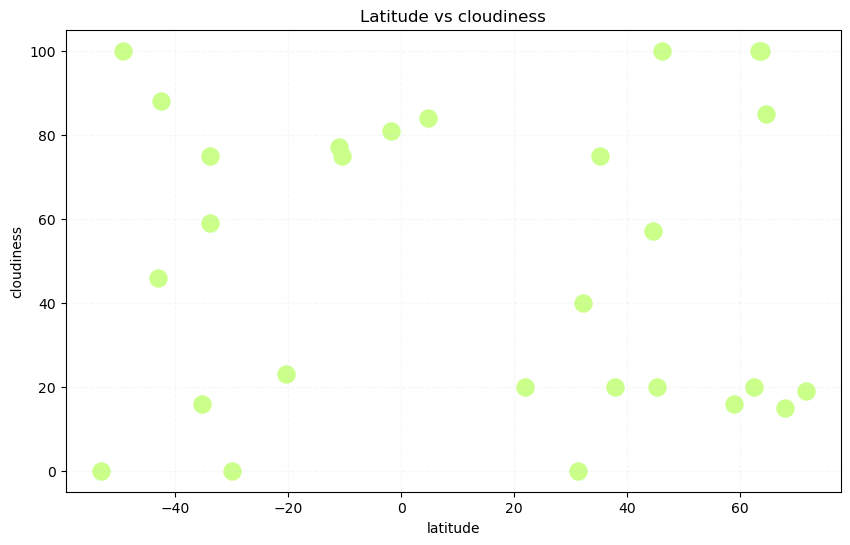

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.cloudiness, color="#CAFF8A", s=150)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

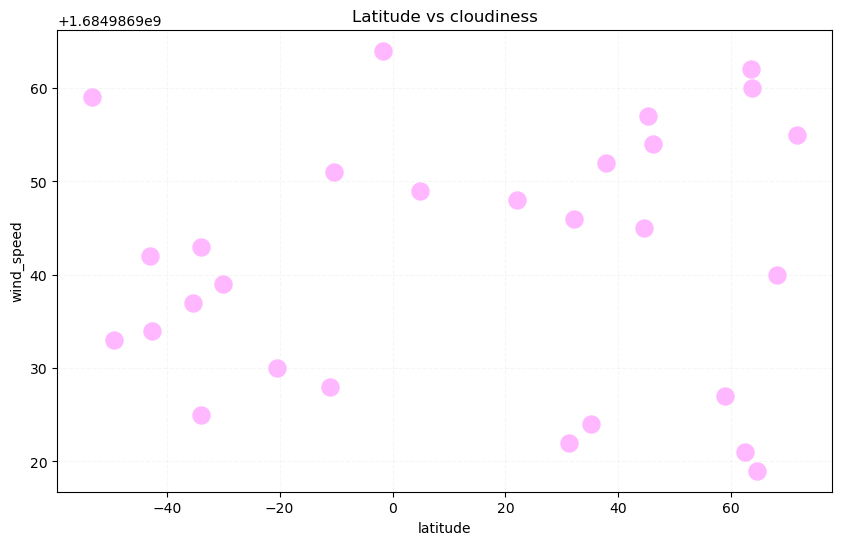

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# # Save the figure
# plt.savefig("output_data/Fig4.png")

# # Show plot
# plt.show()

plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.wind_speed, color="#FFB7FF", s=150)
plt.xlabel("latitude")
plt.ylabel("wind_speed")
plt.title("Latitude vs cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# # # Save the figure
plt.savefig("../output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Ust-Nera,RU,64.566376,143.237839,39.60,1009,90,1684986919,85,39.60,1684986919
1,Yellowknife,CA,62.454081,-114.377385,62.78,1011,48,1684986921,20,62.78,1684986921
2,Rocky Point,MX,31.317087,-113.531819,75.90,1007,64,1684986922,0,75.90,1684986922
3,Fort Bragg,US,35.140311,-79.154146,60.35,1015,62,1684986924,75,64.72,1684986924
4,Hinna,NO,58.910323,5.727972,46.69,1026,83,1684986927,16,48.06,1684986927


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,Max_Temp,date
0,Cape Town,ZA,-33.928992,18.417396,55.06,1008,93,1684986925,75,55.89,1684986925
1,Formosa do Rio Preto,BR,-11.041454,-45.190398,71.44,1015,78,1684986928,77,71.44,1684986928
2,Otjiwarongo,NaN,-20.463583,16.649099,51.12,1016,61,1684986930,23,51.12,1684986930
3,Port-aux-Français,FR,-49.349761,70.219956,42.37,1003,99,1684986933,100,42.37,1684986933
4,Chonchi,CL,-42.623976,-73.772442,46.02,1005,80,1684986934,88,46.02,1684986934


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6144304107746775


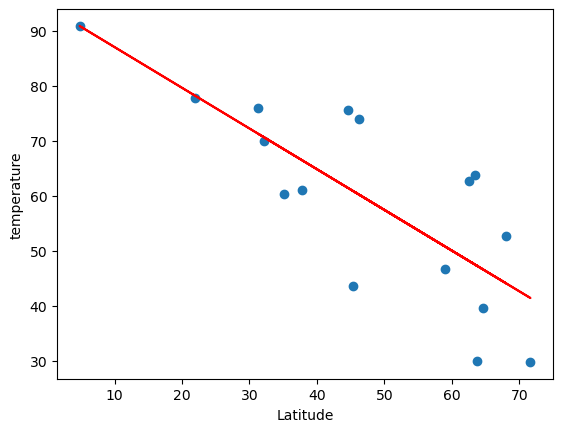

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [20]:
# RElationship of linear regression Temp vs Lattitude Northern hemisphere 
# The regression reflects the hight the latitude coordinate the tempature will rise 

The r-value is: 0.7198377543765635


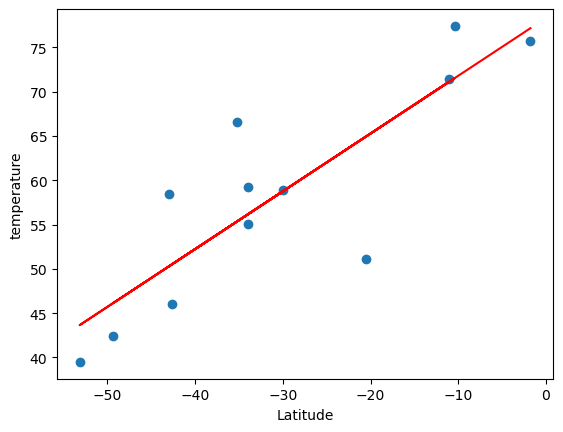

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "temperature",(6,-10))

In [22]:
# RElationship of linear regression Temp vs Lattitude Southern hemisphere 
# The regression reflects the lower the latitude coordinate the tempature will fall

In [23]:
import statsmodels.api as sm

In [24]:
X = northern_hemi_df["latitude"]
y = northern_hemi_df["temperature"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     22.31
Date:                Wed, 24 May 2023   Prob (F-statistic):           0.000326
Time:                        22:56:03   Log-Likelihood:                -60.735
No. Observations:                  16   AIC:                             125.5
Df Residuals:                      14   BIC:                             127.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.4683      7.914     11.937      0.0

C:\Users\jenni\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


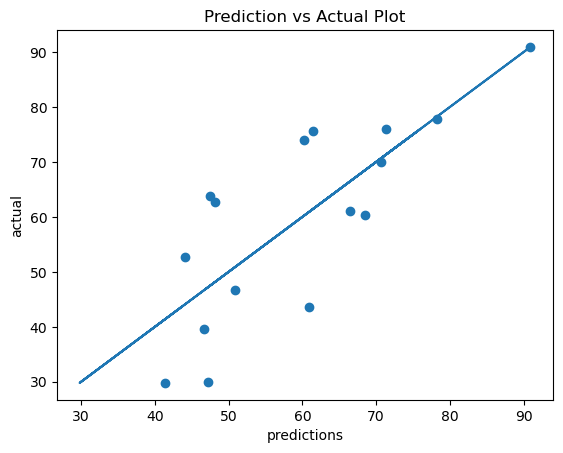

In [25]:
plt.scatter(predictions, y)
plt.xlabel("predictions")
plt.ylabel("actual")
plt.title("Prediction vs Actual Plot")
plt.plot(y, y)
plt.show()

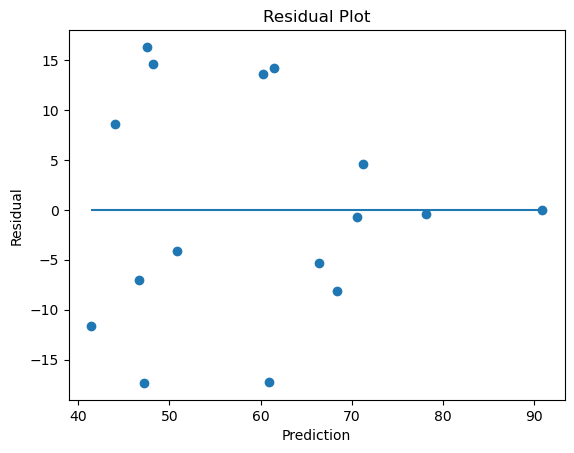

In [26]:
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.hlines(0, min(predictions), max(predictions))
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [27]:
#The lower the latitude coordinate in the southern hemisphere the less humidity and in the northern hemisphere as the latitude 
#coordinate increases the humidity

The r-value is: 0.04798605682619182


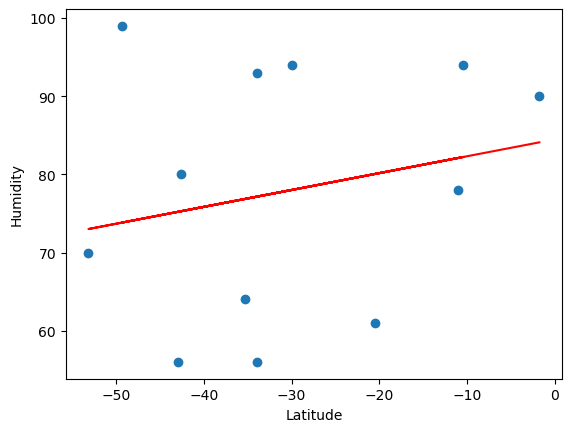

In [28]:
# southern Hemisphere 
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.0011550071698544523


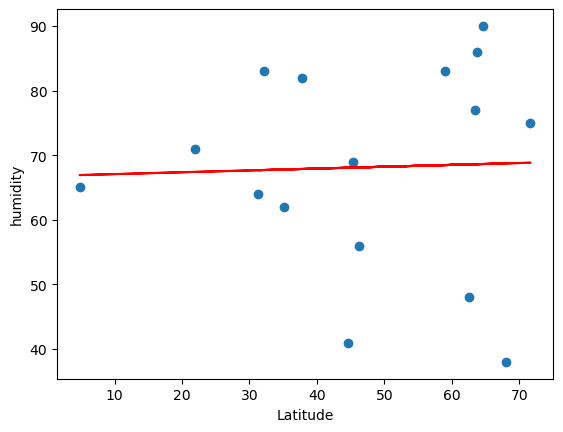

In [29]:
#Northern Hemisphere 
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "humidity",(6,-10))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05169908739250617


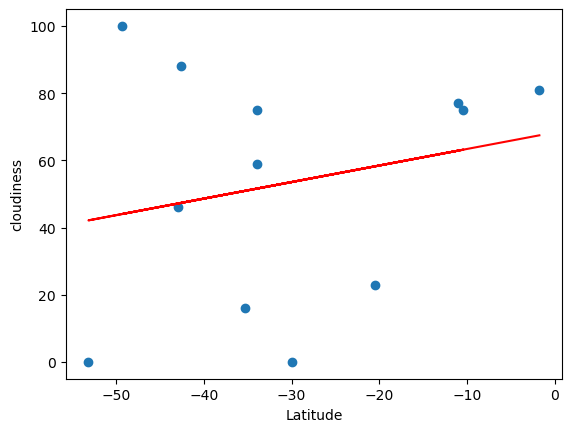

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

The r-value is: 0.00014302325425524535


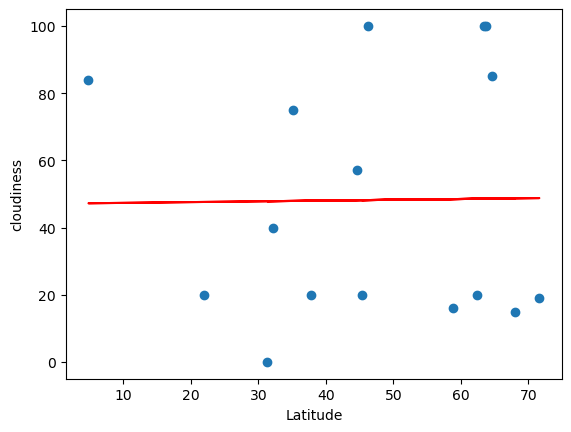

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "cloudiness",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [32]:
# as the latitude in the northern hemisphere increases the cloudiness decreases 
# in the southern hemisphere as the latitude decreases the cloudiness increases 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03022514527445849


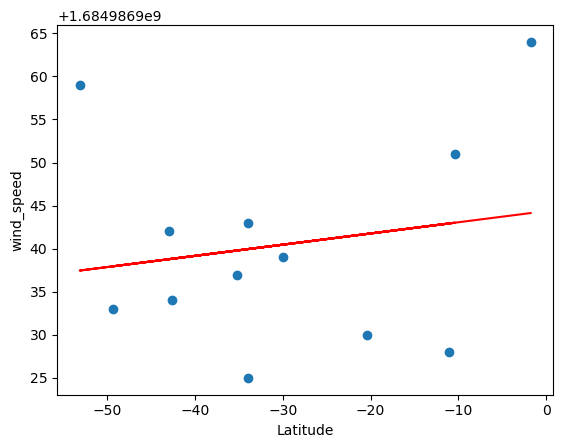

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

The r-value is: 0.0006672952837051031


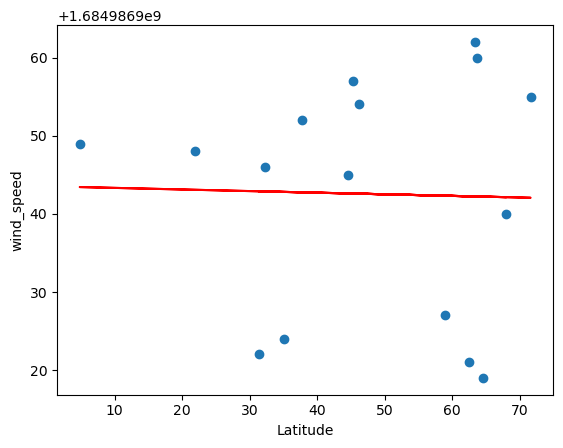

In [34]:
# Northhern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "wind_speed",(6,-10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [35]:
# in the northernhemisphere as the latitude coordinate increases the windspeed decreases 
# in the Southernhemisphere as the latitude coordinate decreases the windspeed increases 